In [57]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git
import preprocess_kgptalkie as ps

#import the required packages/libraries 
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk import wordpunct_tokenize, pos_tag, ne_chunk
from nltk.util import ngrams

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-k5ap9_zp
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-k5ap9_zp
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11743 sha256=442092b69fa5bb637a69a116c40c02e10efd077e982d5535c18dd6a17c1bbc03
  Stored in directory: /tmp/pip-ephem-wheel-cache-vei_i1gl/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package

In [58]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
url = "https://en.wikipedia.org/wiki/Google" #Get this url webpage information
get_text = requests.get(url).text #get raw data
soup = BeautifulSoup(get_text, 'lxml') #Parasing the content 

print(soup.prettify) #Printing the parsed data

In [ ]:
for script in soup(['script','style']): #use for loop to clean the text file from HTML values
  script.decompose()
  txt_file_content = soup.get_text() #grab text

print(txt_file_content) #print data

In [61]:
with open("input.txt","w") as f: #Creat new file and save the data 
  f.write(str(txt_file_content)) #w rite to the file

with open("/content/input.txt", "r", encoding='latin-1') as file:  # open and read the file 
    text = file.read() #read the text file 

text[0:1000]  #look at the file to see the what is read

"\n\n\nGoogle - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGoogle\n\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nThis article is about the company. For the search engine, see Google Search. For other uses, see Google (disambiguation).\nNot to be confused with Googol or Goggles.\n\n\nAmerican technology company\n\n\nGoogle LLCLogo since 2015[update]Google's headquarters, the GoogleplexFormerlyGoogle Inc. (1998â\x80\x932017)TypeSubsidiary (LLC)IndustryInternetCloud computingComputer softwareComputer hardwareArtificial intelligenceAdvertisingFoundedSeptemberÂ\xa04, 1998; 22 years agoÂ\xa0(1998-09-04)[a] in Menlo Park, California, United StatesFoundersLarry PageSergey BrinHeadquarters1600 Amphitheatre Parkway, Mountain View, California, United StatesQueenstown, Singapore (Asia-Pacific)[5]Area servedWorldwideKey peopleSundar Pichai (CEO)Ruth Porat (CFO)ProductsList of productsRevenue182,527,000,000 United States dollar (20

In [62]:
def sToken(token): #sentence tokenization function
  stoken = sent_tokenize(token) #tokenize the cleaned data
  return str (stoken)

In [63]:
s_Token = sToken(text) #pass in the text
s_Token #looking at the data

'[\'\\n\\n\\nGoogle - Wikipedia\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\nGoogle\\n\\nFrom Wikipedia, the free encyclopedia\\n\\n\\n\\nJump to navigation\\nJump to search\\nThis article is about the company.\', \'For the search engine, see Google Search.\', \'For other uses, see Google (disambiguation).\', \'Not to be confused with Googol or Goggles.\', "American technology company\\n\\n\\nGoogle LLCLogo since 2015[update]Google\'s headquarters, the GoogleplexFormerlyGoogle Inc. (1998â\\x80\\x932017)TypeSubsidiary (LLC)IndustryInternetCloud computingComputer softwareComputer hardwareArtificial intelligenceAdvertisingFoundedSeptemberÂ\\xa04, 1998; 22 years agoÂ\\xa0(1998-09-04)[a] in Menlo Park, California, United StatesFoundersLarry PageSergey BrinHeadquarters1600 Amphitheatre Parkway, Mountain View, California, United StatesQueenstown, Singapore (Asia-Pacific)[5]Area servedWorldwideKey peopleSundar Pichai (CEO)Ruth Porat (CFO)Pro

In [64]:
def wToken(token): #word tokenization function
  wtoken = word_tokenize(token)
  return wtoken

In [ ]:
w_Token = wToken(s_Token)
len(w_Token),w_Token

In [66]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[(',', 3708), ("'", 2273), ('.', 1905), ('the', 688), ("''", 604), ('Google', 538), ('on', 370), ('[', 365), (']', 365), ('from', 348)]


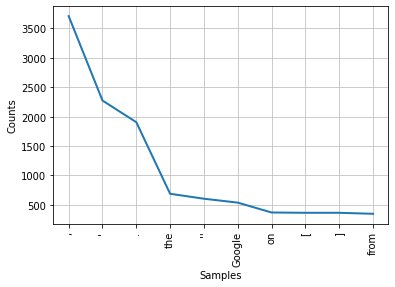

In [67]:
def freq_dist(text):
  frequency = FreqDist(text) # this determine the frequency 
  print(frequency.most_common(10)) #getting the most common
  return frequency.plot(10) #plot the data points

graph1 = freq_dist(w_Token) #call the function
graph1

In [ ]:
clean_words = [] #create list of clean words

for w in w_Token: #use for loop to go through each element.
  if w.isalpha(): # checks for alphabet charcter
    clean_words.append(w.lower()) #lower case everthing

clean_words #look at the data

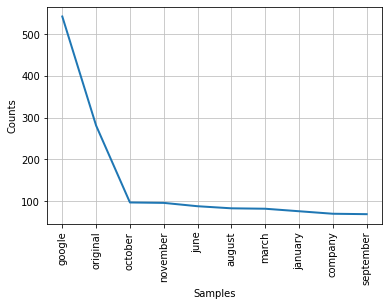

([('google', 542),
  ('original', 281),
  ('october', 97),
  ('november', 96),
  ('june', 88),
  ('august', 83),
  ('march', 82),
  ('january', 76),
  ('company', 70),
  ('september', 69)],
 None)

In [69]:
stopwords = nltk.corpus.stopwords.words("english")

filtered = []
for word in clean_words:
  if word not in stopwords:
    filtered.append(word)

filtered
freq_distribution = FreqDist(filtered)
freq_distribution.most_common(10), freq_distribution.plot(10)

In [ ]:
pos_tagging = nltk.pos_tag(filtered)
pos_tagging

In [ ]:
pStemmer = SnowballStemmer('english')

stemmed_lst = []

for words in filtered:
  stemmed_lst.append(pStemmer.stem(words))

stemmed_lst


In [ ]:
lemmatized = WordNetLemmatizer()

lemmatized_lst = []

for words in filtered:
  lemmatized_lst.append(lemmatized.lemmatize(words))

lemmatized_lst

In [ ]:
#Named Entity Recognition (NER)
print(ne_chunk(pos_tag(wordpunct_tokenize(str (filtered)))))

In [74]:
import nltk, re, string, collections
from nltk.util import ngrams
n_grams = ngrams(filtered,3)
ngrams_freq = collections.Counter(n_grams)
ngrams_freq.most_common(10)

[(('new', 'york', 'times'), 21),
 (('original', 'november', 'november'), 18),
 (('original', 'march', 'march'), 17),
 (('original', 'december', 'december'), 15),
 (('original', 'august', 'august'), 15),
 (('verge', 'media', 'original'), 15),
 (('original', 'october', 'october'), 14),
 (('york', 'times', 'original'), 13),
 (('original', 'january', 'january'), 11),
 (('original', 'june', 'june'), 10)]